MNS Computer Practical Exercise 04
</br>Bramantyo Ibrahim Supriyatno

In [1]:
import numpy as np
import math
from IPython.display import Image
import matplotlib.pyplot as plt
from scipy import integrate

# Analytical Solutions to ODEs

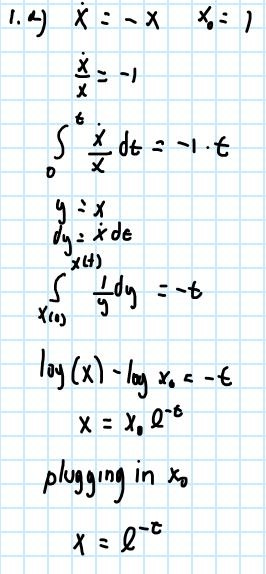

In [2]:
Image('1.JPG')

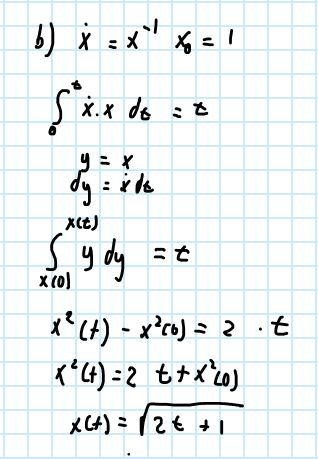

In [3]:
Image('2.JPG')

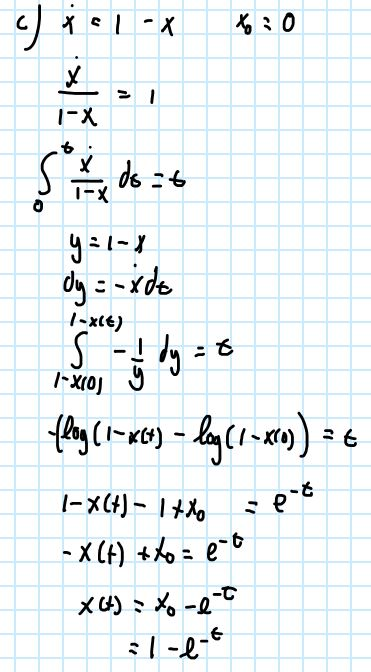

In [4]:
Image('3.JPG')

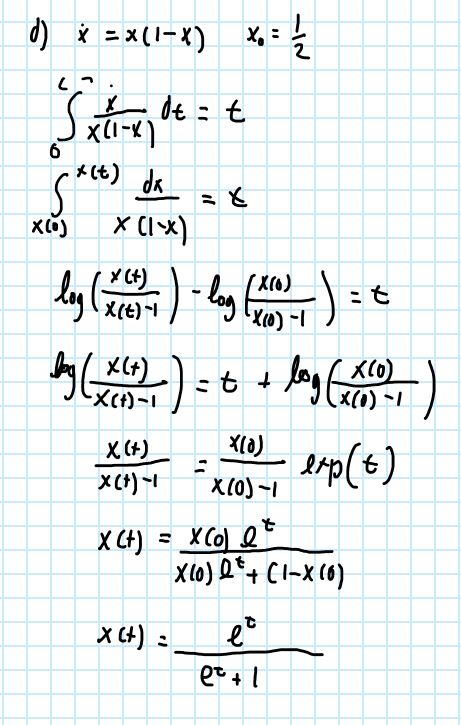

In [5]:
Image('4.JPG')

# Numerical Solutions to ODE

## A

In [6]:
def euler(f_func, x_0, t_max, dt):
    t = np.arange(0,t_max,step=dt)
    x_res = np.zeros_like(t)
    x_res[0] = x_0
    for i in range(1, t.shape[0]):
        x_res[i] = x_res[i-1] + f_func(x=x_res[i-1], t=t[i]) * dt
    return x_res

## B

In [7]:
def prob_a(x,t):
    return -x

In [8]:
def prob_b(x,t):
    return 1./x

In [9]:
def prob_c(x,t):
    return 1. - x

In [10]:
def prob_d(x,t):
    return x * (1.-x)

In [11]:
def prob_a_al(t):
    return np.exp(-t)

In [12]:
def prob_b_al(t):
    return np.sqrt(2*t-1)

In [13]:
def prob_c_al(t):
    return 1. - np.exp(-t)

In [14]:
def prob_d_al(t):
    nom = np.exp(t)
    return nom / (nom + 1)

In [15]:
del_t = 0.01
max_t = 5

In [16]:
prob_a_euler = euler(prob_a, 1., t_max = max_t, dt = del_t)
prob_b_euler = euler(prob_b, 1, t_max = max_t, dt = del_t)
prob_c_euler = euler(prob_c, 0, t_max = max_t, dt = del_t)
prob_d_euler = euler(prob_d, 0.5, t_max = max_t, dt = del_t)

In [17]:
t = np.arange(0, max_t, step=del_t)

In [18]:
prob_a_analytical = prob_a_al(t)
prob_b_analytical = prob_b_al(t)
prob_c_analytical = prob_c_al(t)
prob_d_analytical = prob_d_al(t)

<ipython-input-12-8d0fd6df9a35>:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*t-1)


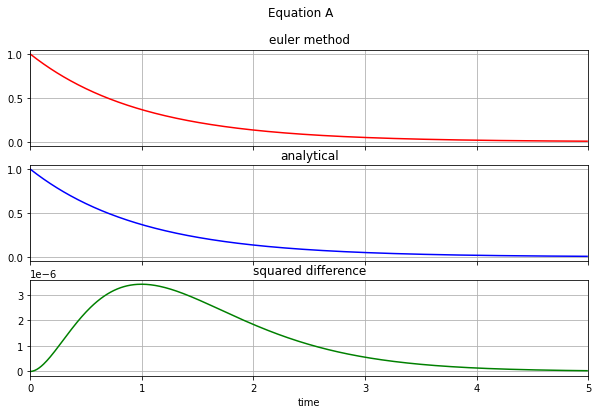

In [19]:
fig, axs = plt.subplots(3, figsize=(10,6), sharex=True)
plt.suptitle('Equation A')

axs[0].plot(t, prob_a_euler, 'r')
axs[0].set_title('euler method')
axs[0].grid(True)
axs[1].plot(t, prob_a_analytical, 'b')
axs[1].set_title('analytical')
axs[1].grid(True)
axs[2].plot(t, np.square(prob_a_euler-prob_a_analytical), 'g')
axs[2].set_title('squared difference')
axs[2].grid(True)
axs[2].set_xlabel('time')

plt.setp(axs, xlim=(0, max_t))
plt.show()

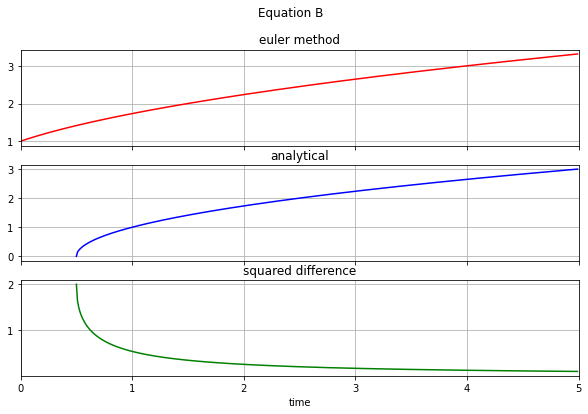

In [20]:
fig, axs = plt.subplots(3, figsize=(10,6), sharex=True)
plt.suptitle('Equation B')

axs[0].plot(t, prob_b_euler, 'r')
axs[0].set_title('euler method')
axs[0].grid(True)
axs[1].plot(t, prob_b_analytical, 'b')
axs[1].set_title('analytical')
axs[1].grid(True)
axs[2].plot(t, np.square(prob_b_euler-prob_b_analytical), 'g')
axs[2].set_title('squared difference')
axs[2].grid(True)
axs[2].set_xlabel('time')

plt.setp(axs, xlim=(0, max_t))
plt.show()

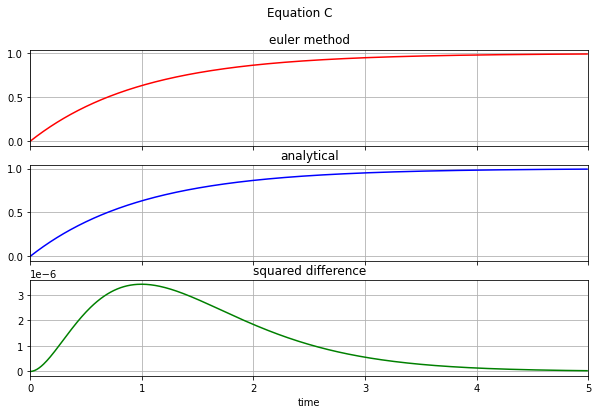

In [21]:
fig, axs = plt.subplots(3, figsize=(10,6), sharex=True)
plt.suptitle('Equation C')

axs[0].plot(t, prob_c_euler, 'r')
axs[0].set_title('euler method')
axs[0].grid(True)
axs[1].plot(t, prob_c_analytical, 'b')
axs[1].set_title('analytical')
axs[1].grid(True)
axs[2].plot(t, np.square(prob_c_euler-prob_c_analytical), 'g')
axs[2].set_title('squared difference')
axs[2].grid(True)
axs[2].set_xlabel('time')

plt.setp(axs, xlim=(0, max_t))
plt.show()

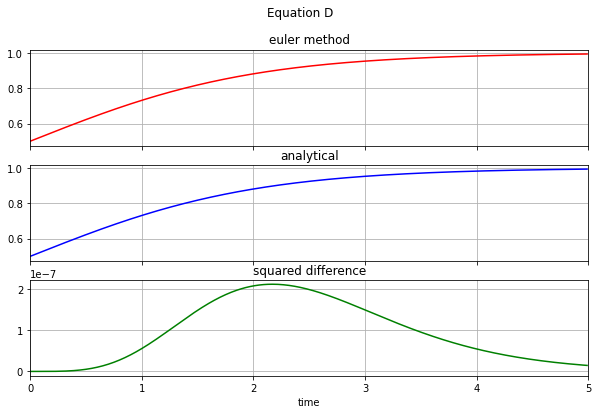

In [22]:
fig, axs = plt.subplots(3, figsize=(10,6), sharex=True)
plt.suptitle('Equation D')

axs[0].plot(t, prob_d_euler, 'r')
axs[0].set_title('euler method')
axs[0].grid(True)
axs[1].plot(t, prob_d_analytical, 'b')
axs[1].set_title('analytical')
axs[1].grid(True)
axs[2].plot(t, np.square(prob_d_euler-prob_d_analytical), 'g')
axs[2].set_title('squared difference')
axs[2].set_xlabel('time')
axs[2].grid(True)

plt.setp(axs, xlim=(0, max_t))
plt.show()

<b>Discussion</b>

Euler method works fine for equation A, C and D. The absolute differences on mentioned equation are relatively small compared to the analytical solutions. However, the method fails for equation B. The method fails to recontruct the square root of a value less than zero.


## C

In [23]:
def runge_kutta(f_func, x_0, t_max, dt):
    t = np.arange(0, t_max, step=dt)
    return integrate.odeint(f_func, x_0, t).ravel()

In [24]:
deltas = [1e-3, 1e-4, 1e-5]

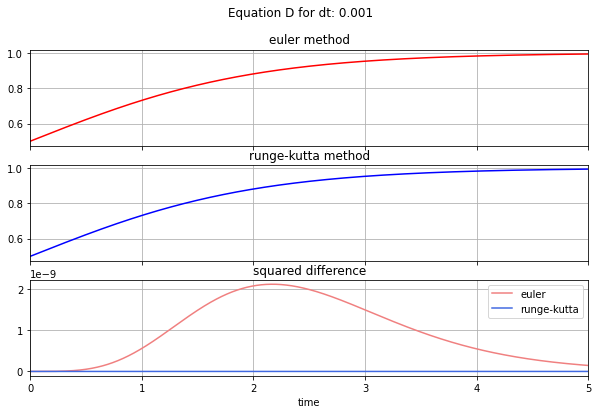

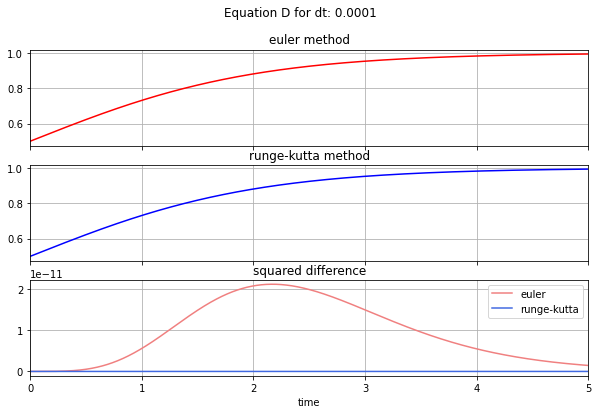

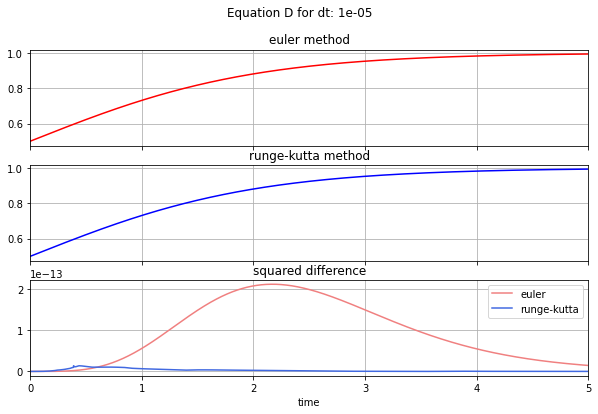

In [25]:
for delta in deltas:
    t = np.arange(0, max_t, step=delta)

    prob_d_euler = euler(prob_d, 0.5, max_t, delta)
    prob_d_rk = runge_kutta(prob_d, 0.5, max_t, delta)

    prob_d_analytical = prob_d_al(t)

    fig, axs = plt.subplots(3, figsize=(10,6), sharex=True)
    plt.suptitle('Equation D for dt: {}'.format(delta))

    axs[0].plot(t, prob_d_euler, 'r')
    axs[0].set_title('euler method')
    axs[0].grid(True)
    axs[1].plot(t, prob_d_rk, 'b')
    axs[1].set_title('runge-kutta method')
    axs[1].grid(True)
    axs[2].plot(t, np.square(prob_d_euler-prob_d_analytical), 'lightcoral', label='euler')
    axs[2].plot(t, np.square(prob_d_rk-prob_d_analytical), 'royalblue', label='runge-kutta')
    axs[2].set_title('squared difference')
    axs[2].set_xlabel('time')
    axs[2].grid(True)
    axs[2].legend()

    plt.setp(axs, xlim=(0, max_t))
    plt.show()

<b>Discussion</b>

In general, runge-kutta performs better than euler method although computationally more expensive. Smaller time step will result in smaller error for both methods


# Passive Membrane

In [26]:
def passive_membrane(x, t, i_func,  params):      
    return (-x + params['Em'] + params['Rm']*i_func(t, params))/params['TC']

In [27]:
def constant_it(t, params):
    return 1e-9

In [28]:
def sin_it(t, params):
    return params['I0']*math.sin(2*math.pi*params['Freq']*t)

In [29]:
def euler_w_params(f_func, i_func, params, x_0, t_max, dt):
    t = np.arange(0, t_max, step=dt)
    x_res = np.zeros_like(t)
    x_res[0] = x_0
    for i  in range(1, t.shape[0]):
        x_res[i] = x_res[i-1] + f_func(x=x_res[i-1], t=t[i], i_func=i_func, params=params) * dt
    return x_res

## A

In [30]:
params = {
    'Rm':1e7,
    'Em':-80e-3,
    'TC':10e-3
}

del_t = 0.0001
max_t = 0.1

t = np.arange(0, max_t, step=del_t)

In [31]:
res = euler_w_params(passive_membrane, constant_it, params, params['Em'],max_t, del_t)

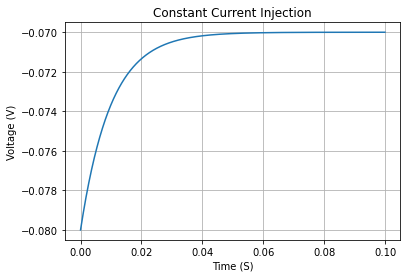

In [32]:
plt.plot(t, res)

plt.ylabel('Voltage (V)')
plt.xlabel('Time (S)')

plt.title('Constant Current Injection')
plt.grid()
plt.show()

## B

In [33]:
freqs = [1,10,30]

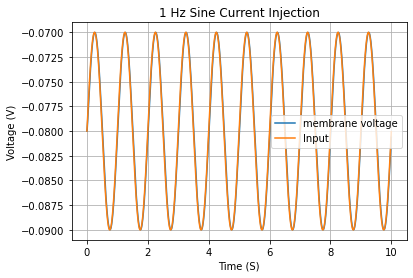

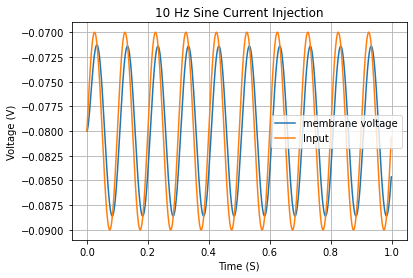

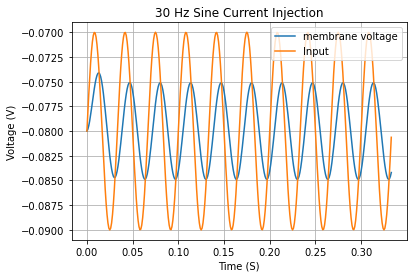

In [34]:

for freq in freqs:

    params = {
        'Rm':1e7,
        'Em':-80e-3,
        'TC':10e-3,
        'I0':1e-9,
        'Freq':freq 
    }
    
    
    del_t = 1e-3
    max_t = (1./freq)*10

    t = np.arange(0, max_t, step=del_t)
    
    res = euler_w_params(passive_membrane, sin_it, params, params['Em'], max_t, del_t)
    current_in = params['Em']+ params['Rm']*params['I0']*np.sin(t*params['Freq']*np.pi*2)
    
    plt.plot(t, res, label='membrane voltage')
    
    
    plt.plot(t, current_in, label='Input')
    plt.ylabel('Voltage (V)')
    plt.xlabel('Time (S)')
    plt.legend()
    plt.title('{} Hz Sine Current Injection'.format(freq))
    plt.grid()
    plt.show()

## C

In [35]:
freqs = np.arange(1,100,step=1)

In [36]:
amp = []
amp_al = []

phase = []
phase_al = []

for freq in freqs:

    params = {
        'Rm':1e7,
        'Em':-80e-3,
        'TC':10e-3,
        'I0':1e-9,
        'Freq':freq 
    }    
    
    del_t = 1e-4
    max_t = (1./freq)*20
    period = int(math.ceil((1./freq) / del_t))
    t = np.arange(0, max_t, step=del_t)
    
    res = euler_w_params(passive_membrane, sin_it, params, params['Em'], max_t, del_t)[-period:]
    current_in = params['Em']+ params['Rm']*params['I0']*np.sin(t*params['Freq']*np.pi*2)[-period:]

    amp_res = 0.5*(np.max(res) - np.min(res))
    amp.append(amp_res)
    
    amp_al.append(params['I0']*params['Rm']*math.sqrt(1/(1 + (2*math.pi*params['Freq']*params['TC'])**2)))
    
    pos_res = np.argmax(res)
    pos_cur = np.argmax(current_in)
    phase_diff = (abs(pos_res - pos_cur)/period)*2*math.pi    
    phase.append(phase_diff)
    
    phase_al.append(math.atan(2*math.pi*params['Freq']*params['TC']))

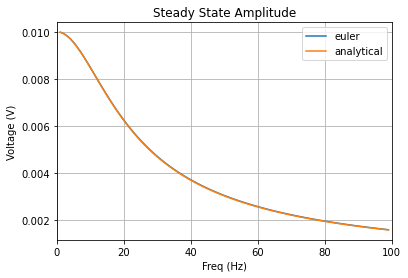

In [37]:
plt.plot(freqs, np.array(amp), label='euler')
plt.plot(freqs, np.array(amp_al), label='analytical')

plt.ylabel('Voltage (V)')
plt.xlabel('Freq (Hz)')
plt.xlim(0,100)
plt.legend()
plt.title('Steady State Amplitude')
plt.grid()

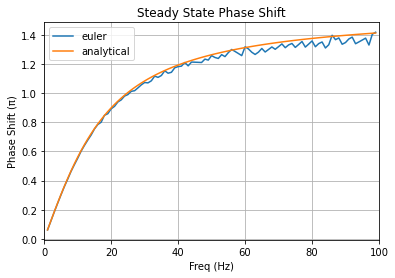

In [38]:
plt.plot(freqs,np.array(phase), label='euler')
plt.plot(freqs,np.array(phase_al), label='analytical')

plt.title('Steady State Phase Shift')
plt.ylabel('Phase Shift (\u03C0)')
plt.xlabel('Freq (Hz)')
plt.xlim(0,100)
plt.legend()
plt.grid()

<b>Discussion</b>

Euler method is quite good at reproducing the amplitude loss and phase shifting properties of the passive membrane model although the error seems to get bigger at higher frequency. This can be mitigated by making the 'delta t' smaller so that the resolution of higher frequency signal is better.
